In [74]:
import json
import pennylane as qml
import pennylane.numpy as np
def circuit_left():
    """
    This function corresponds to the circuit on the left-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT([0, 1])
    qml.Hadamard(wires=0)

def circuit_right():
    """
    This function corresponds to the circuit on the right-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.Hadamard(wires=1)
    qml.CNOT([1, 2])

def U():
    """This operator generates a PauliX gate on a random qubit"""
    qml.PauliX(wires=1)

In [76]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(alpha, beta, gamma):
    """Total circuit joining each block.

    Args: 
        alpha (float): The first parameter of a U3 gate.
        beta (float):The second parameter of a U3 gate. 
        gamma (float): The third parameter of a U3 gate. 
    
    Returns:
        (float): The expectation value of an observable.
    """
    qml.U3(alpha, beta, gamma, wires=0)
    circuit_left()
    U()
    circuit_right()

    # Here we are returning the expected value with respect to any observable,
    # the choice of observable is not important in this exercise.

    return qml.expval(0.5 * qml.PauliZ(2) - qml.PauliY(2))

# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(*angles)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-4
    ), "The expected output is not quite right."

    ops = circuit.tape.operations

    for op in ops:
        assert not (0 in op.wires and 2 in op.wires), "Invalid connection between qubits."

    assert circuit.tape.observables[0].wires == qml.wires.Wires(2), "Measurement on wrong qubit."

# These are the public test cases
test_cases = [
    ('[2.0,1.0,3.0]', '-0.97322'),
    ('[-0.5,1.2,-1.2]', '0.88563'),
    ('[0.22,3.0,2.1]', '0.457152'),
    ('[2.22,3.1,-3.3]', '-0.335397'),
    ('[-0.2,-0.1,3.4]', '0.470199'),
    ('[-1.2,-1.1,0.4]', '-0.6494612')
]
# This will run the public test cases locally
# for i, (input_, expected_output) in enumerate(test_cases):
#     print(f"Running test case {i} with input '{input_}'...")

#     try:
#         output = run(input_)

#     except Exception as exc:
#         print(f"Runtime Error. {exc}")

#     else:
#         if message := check(output, expected_output):
#             print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

#         else:
#             print("Correct!")

(<Figure size 800x400 with 1 Axes>, <Axes: >)

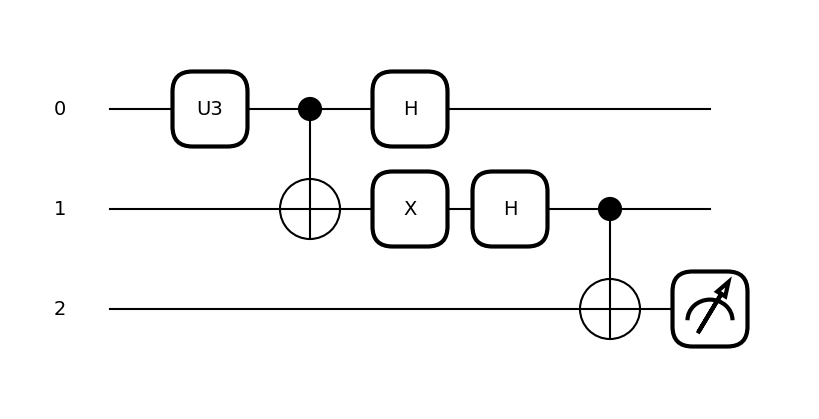

In [77]:
qml.draw_mpl(circuit)(2.0, 0.2, 0)

In [78]:
run(test_cases[1][0])

'0.0'